In [1]:
import sys
import os
from pathlib import Path
import re
import numpy as np
import pickle

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

COMMON = Path('../data/raw/COMMON_images_masks/')
GROUP = Path('../data/raw/GROUP_images/')
DATA = (COMMON.parent).parent
MASKS = DATA/'masks'

import SimpleITK as sitk
from utils import *
from linear_registration import register_linear

In [60]:
common_names = ['common_40', 'common_41', 'common_42']
common_paths = [COMMON/(name+'_image.nii.gz') for name in common_names]
group_paths = [file for file in GROUP.iterdir()]
group_pattern = re.compile(r'^(g\d{1,2}_\d{2})_image\.nii\.gz$')

group_names = []

for file in GROUP.iterdir():
    match = group_pattern.match(file.name)
    if match:
        group_names.append(match.group(1))

print(f"{common_names=}")
print(f"{group_names=}")


common_names=['common_40', 'common_41', 'common_42']
group_names=['g3_60', 'g1_54', 'g5_66', 'g8_74', 'g4_64', 'g11_85', 'g11_83', 'g3_59', 'g10_80', 'g1_55', 'g6_68', 'g6_69', 'g12_86', 'g2_58', 'g10_82', 'g8_75', 'g4_63', 'g4_62', 'g9_78', 'g5_65', 'g7_73', 'g2_57', 'g9_79', 'g9_77', 'g7_72', 'g1_56', 'g10_81', 'g7_71']


In [209]:
# Create or load the training vectors for group images
pkl_path = DATA/'training/group_train_vects.pkl'
if os.path.exists(pkl_path):
    with open(pkl_path, "rb") as f:
        group_train_vects = pickle.load(f)
    print("group_train_vects loaded from file")

else:
    group_train_vects = []

    for path in group_paths:
        im = sitk.ReadImage(path)
        n_slices = im.GetSize()[2]
        group_train_vects.append(np.zeros(n_slices, dtype=int))
        del im

    with open(pkl_path, "wb") as f:
        pickle.dump(group_train_vects, f)

    print("group_train_vects created and saved")


group_train_vects loaded from file


In [171]:
im_idx = 27
im = sitk.ReadImage(group_paths[im_idx])
im_arr = sitk.GetArrayFromImage(im)
show_interactive(im_arr,'axial')
print(f'im: {group_names[im_idx]},   nr. axial slices: {group_train_vects[im_idx].size}')

interactive(children=(IntSlider(value=126, description='slc', max=252), Output()), _dom_classes=('widget-inter…

im: g7_71,   nr. axial slices: 253


In [172]:
initial = 37
final = 68
for nr in range (initial, final+1):
    group_train_vects[im_idx][nr] = 1

In [174]:
group_train_vects[im_idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [59]:
with open (DATA/'training/group_train_vects.pkl', "wb") as f:
    pickle.dump(group_train_vects, f)

In [89]:
# COMMON images manual classification
# Create or load the training vectors for group images
pkl_path = DATA/'training/common_train_vects.pkl'
if os.path.exists(pkl_path):
    with open(pkl_path, "rb") as f:
        common_train_vects = pickle.load(f)
    print("common_train_vects loaded from file")

else:
    common_train_vects = []

    for path in common_paths:
        im = sitk.ReadImage(path)
        n_slices = im.GetSize()[2]
        common_train_vects.append(np.zeros(n_slices, dtype=int))
        del im

    with open(pkl_path, "wb") as f:
        pickle.dump(common_train_vects, f)

    print("common_train_vects created and saved")


common_train_vects loaded from file


In [85]:
im_idx = 2
im = sitk.ReadImage(common_paths[im_idx])
im_arr = sitk.GetArrayFromImage(im)
show_interactive(im_arr,'axial')
print(f'im: {common_names[im_idx]},   nr. axial slices: {group_train_vects[im_idx].size}')

interactive(children=(IntSlider(value=145, description='slc', max=290), Output()), _dom_classes=('widget-inter…

im: common_42,   nr. axial slices: 241


In [86]:
initial = 22
final = 48
for nr in range (initial, final+1):
    common_train_vects[im_idx][nr] = 1

In [87]:
with open (DATA/'training/common_train_vects.pkl', "wb") as f:
    pickle.dump(common_train_vects, f)

# Classification algorithm and training

In [91]:
from skimage.transform import resize
from sklearn.ensemble import RandomForestClassifier

def extract_features_from_slice(slice_2d, target_size=(32, 32)):
    """
    Extract features for pubis classficiation. Input is a 2D numpy array
    """
    # Resize to capture general image features
    resized = resize(slice_2d, target_size, anti_aliasing=True, preserve_range=True)
    
    # Flatten
    features = resized.flatten()
    return features

def train_classifier(im_list, labels_list):
    """
    Train a classifier using .nii images
    """
    X_train = []
    y_train = []
    
    for i, img_path in enumerate(im_list):
        # Note: SimpleITK.GetArrayFromImage returns arrays in the form (Z, Y, X)
        # Z is the axial-slice index
        sitk_img = sitk.ReadImage(img_path)
        img_data = sitk.GetArrayFromImage(sitk_img)
            
        labels = labels_list[i]
        n_slices = img_data.shape[0]
        
        print(f"Processing training image {i+1} ({n_slices} axial slices)...")
        
        for z in range(n_slices):
            # access as [z, y, x]
            features = extract_features_from_slice(img_data[z, :, :])
            X_train.append(features)
            y_train.append(labels[z])
            
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    print(f"Training classifier (Random Forest)...")
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    return clf

In [178]:
pubis_classifier = train_classifier(group_paths, group_train_vects)

Processing training image 1 (242 axial slices)...
Processing training image 2 (276 axial slices)...
Processing training image 3 (241 axial slices)...
Processing training image 4 (205 axial slices)...
Processing training image 5 (272 axial slices)...
Processing training image 6 (231 axial slices)...
Processing training image 7 (312 axial slices)...
Processing training image 8 (276 axial slices)...
Processing training image 9 (261 axial slices)...
Processing training image 10 (301 axial slices)...
Processing training image 11 (249 axial slices)...
Processing training image 12 (272 axial slices)...
Processing training image 13 (245 axial slices)...
Processing training image 14 (277 axial slices)...
Processing training image 15 (278 axial slices)...
Processing training image 16 (251 axial slices)...
Processing training image 17 (269 axial slices)...
Processing training image 18 (261 axial slices)...
Processing training image 19 (261 axial slices)...
Processing training image 20 (209 axial 

In [107]:
def pubic_symphysis_selection(im_path, classifier):
    sitk_img = sitk.ReadImage(im_path)
    img_data = sitk.GetArrayFromImage(sitk_img) # (Z, Y, X)
    
    n_slices = img_data.shape[0]
    probabilities = []
    
    print(f"Analyzing test image: {im_path}")
    
    for z in range(n_slices):
        features = extract_features_from_slice(img_data[z, :, :])
        prob = classifier.predict_proba([features])[0, 1]
        probabilities.append(prob)
        
    best_slice_idx = np.argmax(probabilities)
    max_prob = probabilities[best_slice_idx]
    
    # --- Plotting ---
    plt.figure(figsize=(10, 5))
    plt.plot(range(n_slices), probabilities, label='Symphysis probability')
    plt.axvline(x=best_slice_idx, color='r', linestyle='--', label=f'Max prob for slice {best_slice_idx}')
    plt.title(f'Probability evolution: {im_path.name}')
    plt.xlabel('Axial slice index')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.imshow(np.flip(img_data[best_slice_idx],0), cmap='gray')
    plt.show()
    
    print(f"-> Symphysis most probably present in slice: {best_slice_idx} (Prob: {max_prob:.4f})")
    
    return best_slice_idx

Analyzing test image: ../data/raw/COMMON_images_masks/common_40_image.nii.gz


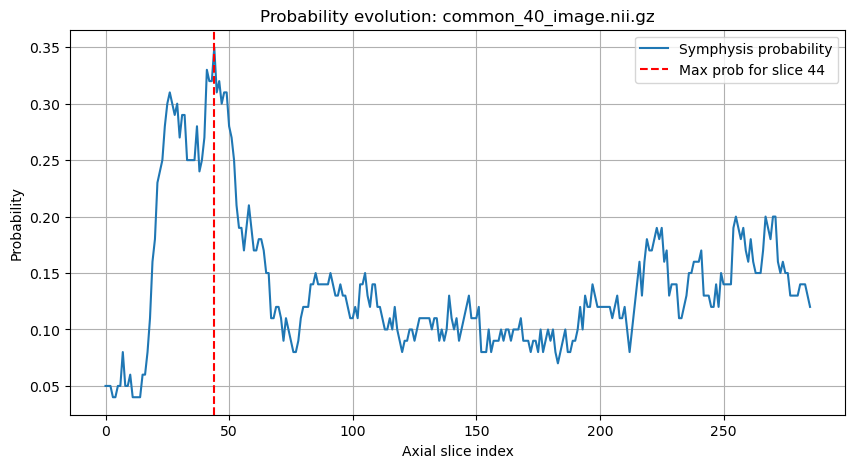

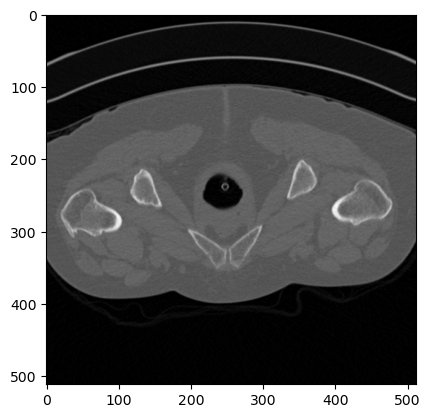

-> Symphysis most probably present in slice: 44 (Prob: 0.3500)
Analyzing test image: ../data/raw/COMMON_images_masks/common_41_image.nii.gz


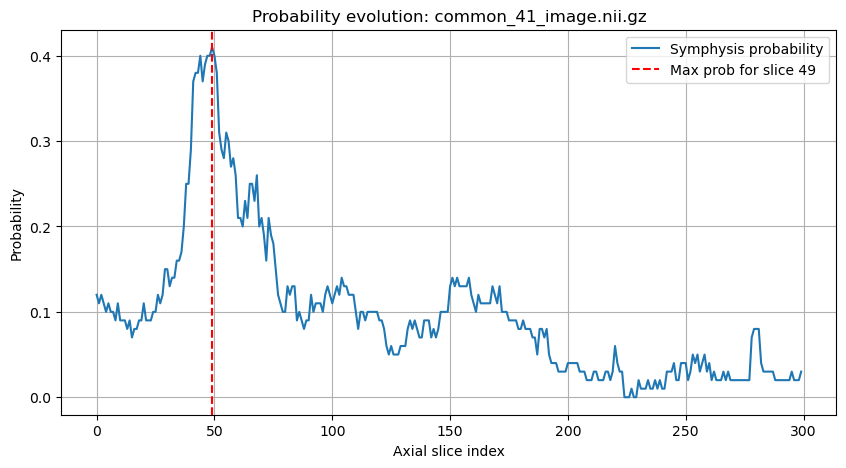

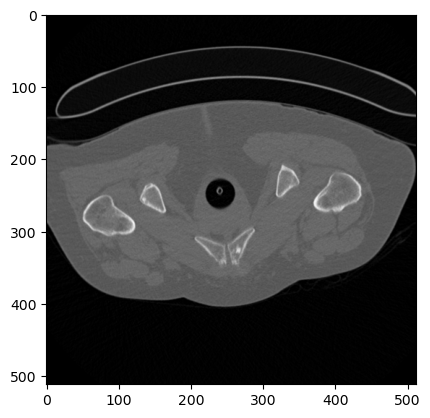

-> Symphysis most probably present in slice: 49 (Prob: 0.4100)
Analyzing test image: ../data/raw/COMMON_images_masks/common_42_image.nii.gz


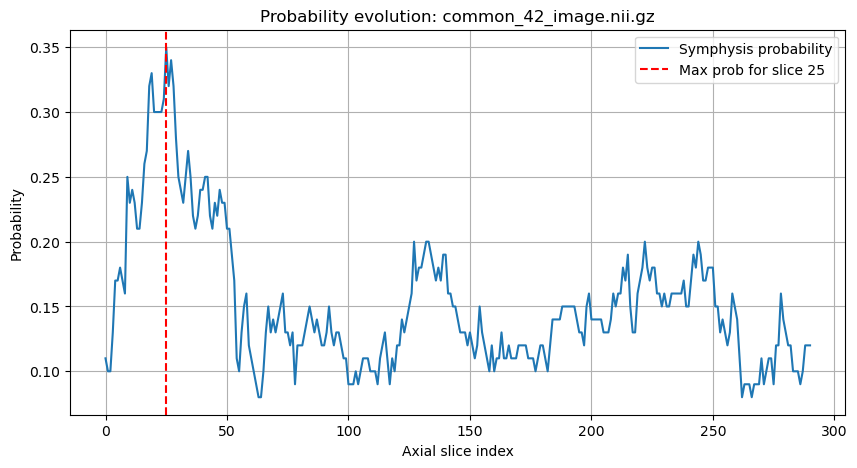

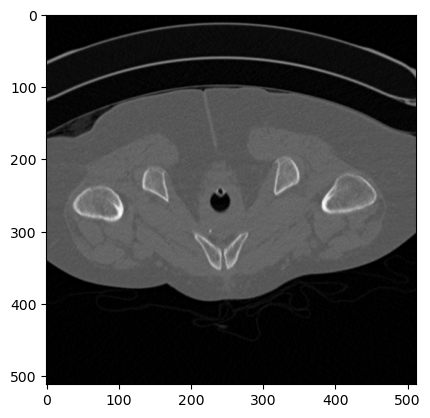

-> Symphysis most probably present in slice: 25 (Prob: 0.3500)


In [179]:
import matplotlib.pyplot as plt
for im in common_paths:
    best_slc = pubic_symphysis_selection(im, pubis_classifier)

In [214]:
im_idx = 2
im = sitk.ReadImage(common_paths[im_idx])
im_arr = sitk.GetArrayFromImage(im)
show_interactive(im_arr,'axial')
print(f'im: {common_names[im_idx]},   nr. axial slices: {group_train_vects[im_idx].size}')

interactive(children=(IntSlider(value=145, description='slc', max=290), Output()), _dom_classes=('widget-inter…

im: common_42,   nr. axial slices: 241


## Modified feature extraction, filtering with HU values

In [211]:
# Using HU threshold
def extract_features_from_slice(slice_2d, target_size=(32, 32), bone_threshold=150):
    
    # Copy original image to not alter it when performing HU thresholding
    bone_image = np.copy(slice_2d)
    
    # HU thresholding
    bone_image[bone_image < bone_threshold] = 0
    
    # bone_image[bone_image >= bone_threshold] = 1 # Uncomment for binary mask generation
    resized = resize(bone_image, target_size, anti_aliasing=True, preserve_range=True)
    
    # Aplanar
    features = resized.flatten()
    return features

In [212]:
pubis_classifier = train_classifier(group_paths, group_train_vects)

Processing training image 1 (242 axial slices)...
Processing training image 2 (276 axial slices)...
Processing training image 3 (241 axial slices)...
Processing training image 4 (205 axial slices)...
Processing training image 5 (272 axial slices)...
Processing training image 6 (231 axial slices)...
Processing training image 7 (312 axial slices)...
Processing training image 8 (276 axial slices)...
Processing training image 9 (261 axial slices)...
Processing training image 10 (301 axial slices)...
Processing training image 11 (249 axial slices)...
Processing training image 12 (272 axial slices)...
Processing training image 13 (245 axial slices)...
Processing training image 14 (277 axial slices)...
Processing training image 15 (278 axial slices)...
Processing training image 16 (251 axial slices)...
Processing training image 17 (269 axial slices)...
Processing training image 18 (261 axial slices)...
Processing training image 19 (261 axial slices)...
Processing training image 20 (209 axial 

Analyzing test image: ../data/raw/COMMON_images_masks/common_40_image.nii.gz


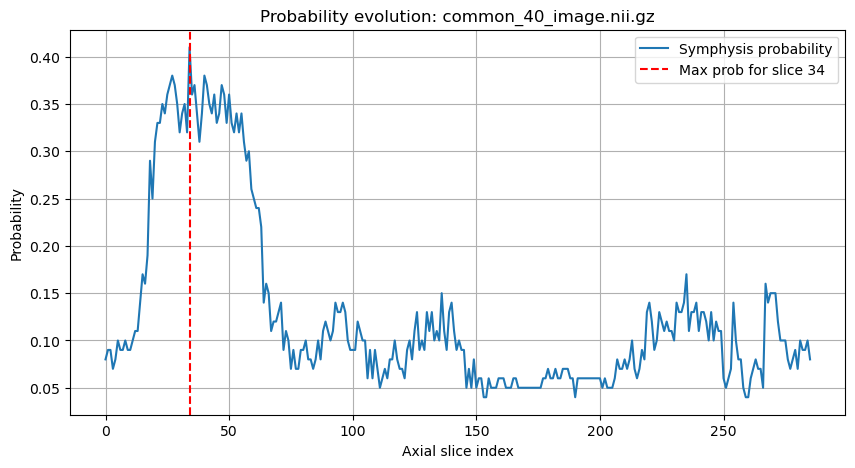

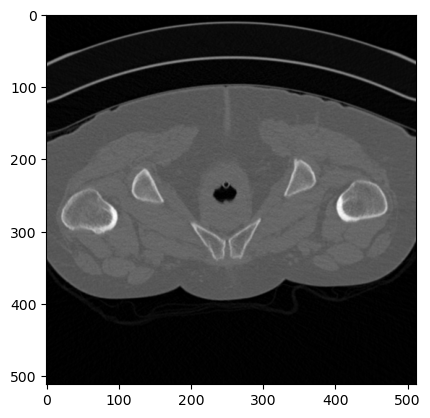

-> Symphysis most probably present in slice: 34 (Prob: 0.4100)
Analyzing test image: ../data/raw/COMMON_images_masks/common_41_image.nii.gz


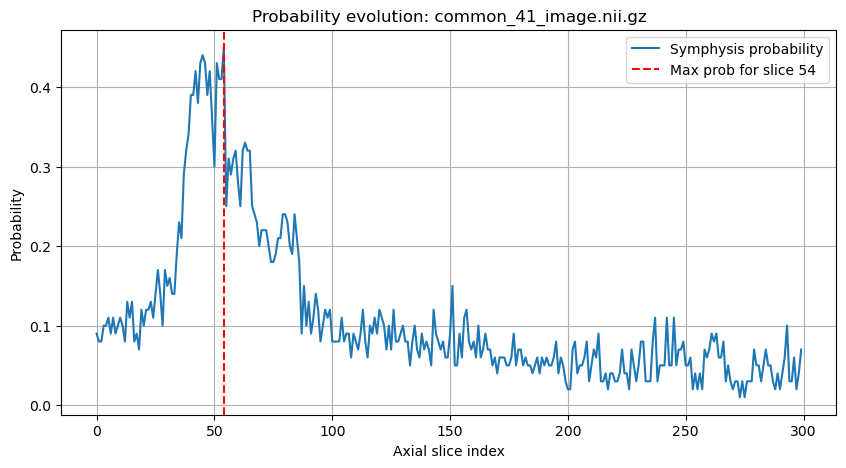

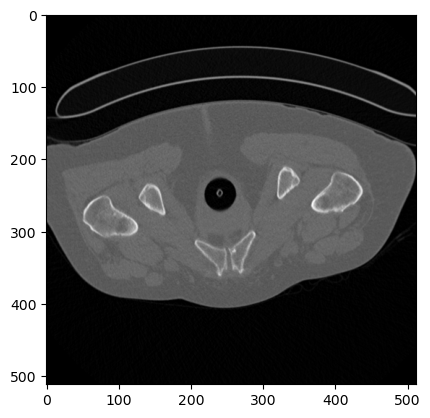

-> Symphysis most probably present in slice: 54 (Prob: 0.4500)
Analyzing test image: ../data/raw/COMMON_images_masks/common_42_image.nii.gz


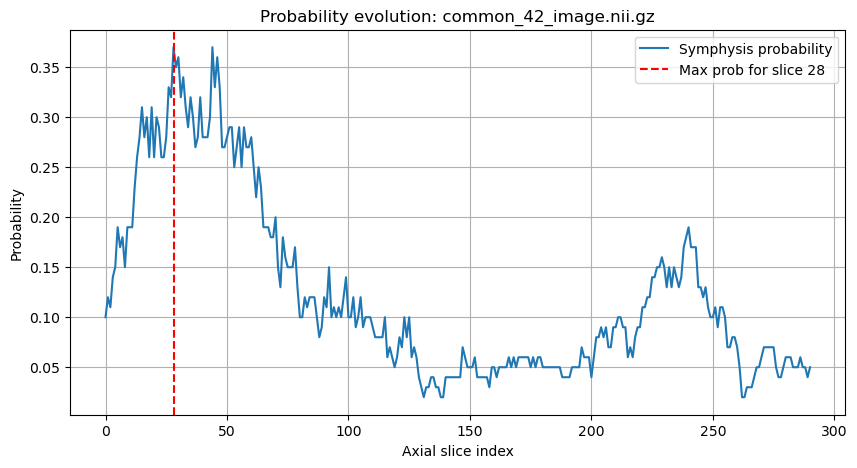

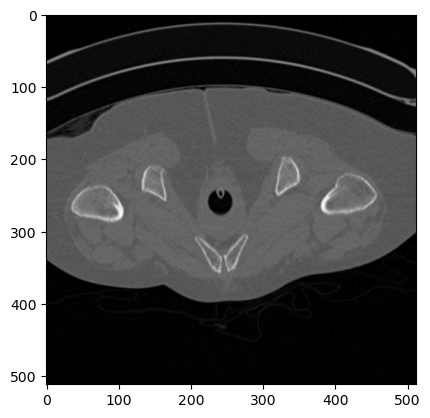

-> Symphysis most probably present in slice: 28 (Prob: 0.3700)


In [213]:
import matplotlib.pyplot as plt
for im in common_paths:
    best_slc = pubic_symphysis_selection(im, pubis_classifier)